### CS 109A/STAT 121A/AC 209A/CSCI E-109A

# Homework 0

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

This is a homework which you must  turn in.

This homework has the following intentions:

1. To get you familiar with the jupyter/python environment (whether you are using your own install or jupyterhub)
2. You should easily understand these questions and what is being asked. If you struggle, this may not be the right class for you.
3. You should be able to understand the intent (if not the exact syntax) of the code and be able to look up google and provide code that is asked of you. If you cannot, this may not be the right class for you.

In [1]:
# The line %... is a jupyter "magic" command, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See the "import ... as ..." contructs below? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import matplotlib.pyplot as plt

## Simulation of a coin throw

We dont have a coin right now. So let us **simulate** the process of throwing one on a computer. To do this we will use a form of the **random number generator** built into `numpy`. In particular, we will use the function `np.random.choice`, which will pick items with uniform probability from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6). 

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)

throws = throw_a_coin(40)
print("Throws",throws)

Throws ['H' 'H' 'T' 'T' 'H' 'T' 'H' 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'H' 'T' 'T' 'H'
 'H' 'H' 'T' 'T' 'H' 'T' 'H' 'T' 'T' 'H' 'H' 'T' 'H' 'H' 'H' 'T' 'H' 'H'
 'T' 'H' 'H' 'H']


This next line gives you a `True` when the array element is a 'H' and `False` otherwise.

In [3]:
throws == 'H'

array([ True,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True])

If you do a `np.sum` on the array of `True`s and `False`s, python will coerce the `True` to 1 and `False` to 0. Thus a sum will give you the number of heads

In [4]:
np.sum(throws == 'H')

21

In [5]:
print("Number of Heads:", np.sum(throws == 'H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws == 'H')/40.) # you can also do np.mean(throws=='H')

Number of Heads: 21
p1 = Number of Heads/Total Throws: 0.525


Notice that you do not necessarily get 20 heads.

Now say that we run the entire process again, a second **replication** to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time? Lets call the odds of heads in sample 2, then, $p_2$:

In [6]:
throws = throw_a_coin(40)
print("Throws:", throws)
print("Number of Heads:", np.sum(throws == 'H'))
print("p2 = Number of Heads/Total Throws:", np.sum(throws ==  'H')/40.)

Throws: ['H' 'H' 'T' 'T' 'T' 'T' 'H' 'T' 'T' 'T' 'H' 'H' 'H' 'H' 'T' 'H' 'T' 'H'
 'T' 'H' 'T' 'T' 'T' 'H' 'T' 'H' 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'T' 'H' 'H'
 'T' 'T' 'H' 'H']
Number of Heads: 21
p2 = Number of Heads/Total Throws: 0.525


### Q1. Show what happens as we choose a larger and larger set of trials

Do one replication for each size in the trials array below. Store the resultant probabilities in an array `probabilities`. Write a few lines on what you observe.

In [7]:
trials = [10, 30, 50, 70, 100, 130, 170, 200, 500, 1000, 2000, 5000, 10000]

In [8]:
probabilities = [np.mean(throw_a_coin(trial) == 'H') for trial in trials]
probabilities

[0.4,
 0.4,
 0.56,
 0.5428571428571428,
 0.56,
 0.46923076923076923,
 0.48823529411764705,
 0.535,
 0.526,
 0.515,
 0.5035,
 0.5102,
 0.5089]

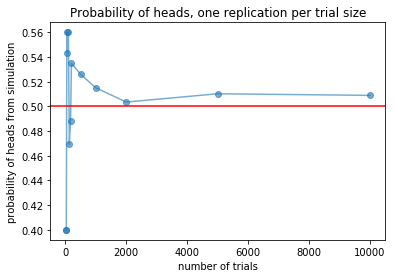

In [9]:
plt.plot(trials, probabilities, 'o-', alpha=0.6);
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('Probability of heads, one replication per trial size');

What did you observe?

As the number of trials increases, the fraction of heads converges in probability towards the expected value of 0.5 in accordance with The Law of Large Numbers. We see that the fluctation in the fraction of heads as we go from one fixed trial size to the next is tending towards 0.

## Multiple replications of the coin flips

Lets redo the experiment with coin flips that we started above. We'll establish some terminology at first. As notation we shall call the size of the trial of coin flips $n$. We'll call the result of each coin flip an observation, and a single replication (which is what we did above) a sample of observations. We will do $M$ replications (or $M$ "samples"), for which the variable in the function below is `number_of_samples` now, for each sample size $n$ (`sample_size`).

### Q2. Write a function to make M replications of N throws

Your job is to write a function `make_throws` which takes as arguments the `number_of_samples` (M) and the `sample_size` (n), and returns a list of probablities of size M, with each probability coming from a different replication of size n. In each replication we do n coin tosses. We have provided a "spec" of the function below. 

In [10]:
"""
Function
--------
make_throws

Generate a array of probabilities, each representing
the probability of finding heads in a sample of fair coins

Parameters
----------
number_of_samples : int
    The number of samples or replications
sample_size: int
    The size of each sample (we assume each sample has the same size)

Returns
-------
sample_probs : array
    Array of probabilities of H, one from each sample or replication

Example
-------
>>> make_throws(number_of_samples = 3, sample_size = 20)
[0.40000000000000002, 0.5, 0.59999999999999998]
"""


def make_throws(number_of_samples, sample_size):
    if not np.issubdtype(type(number_of_samples), np.integer):
        raise TypeError("'number_of_samples' must be of type 'integer'")
    if not np.issubdtype(type(sample_size), np.integer):
        raise TypeError("'sample_size' must be of type 'integer'")
    if number_of_samples <= 0:
        raise ValueError(("'number_of_samples' must be greater than 0"))
    if sample_size <= 0:
        raise ValueError(("'sample_size' must be greater than 0"))

    sample_probs = [np.mean(throw_a_coin(sample_size) == 'H')
                   for sample in range(number_of_samples)]
    return sample_probs

We show the mean over the observations, or sample mean, for a sample size of 10, with 20 replications. There are thus 20 means.

In [11]:
make_throws(number_of_samples=20, sample_size=10)

[0.4,
 0.7,
 0.5,
 0.3,
 0.7,
 0.3,
 0.4,
 0.9,
 0.3,
 0.7,
 0.4,
 0.4,
 0.5,
 0.5,
 0.6,
 0.4,
 0.6,
 0.8,
 0.4,
 0.3]

### Q3. What happens to the mean and standard deviation of the sample means as you increase the sample size

Using the sample sizes from the `sample_sizes` array below, compute a set of sample_means for each sample size, and for 200 replications. Calculate the mean and standard deviation for each sample size. Store this in arrays `mean_of_sample_means` and `std_dev_of_sample_means`. The standard deviation of the sampling means is called the "standard error". Explain what you see about this "mean of sampling means".

In [12]:
sample_sizes = np.arange(1,1001,1)

In [13]:
throws = [make_throws(number_of_samples=200, sample_size=sample_size)
          for sample_size in sample_sizes]
mean_of_sample_means = np.mean(throws, axis=1)

In [14]:
std_dev_of_sample_means = np.std(throws, axis=1)

In [15]:
# mean and std of 200 means from 200 replications, each of size 10
trials[0], mean_of_sample_means[0], std_dev_of_sample_means[0]

(10, 0.425, 0.49434299833212975)

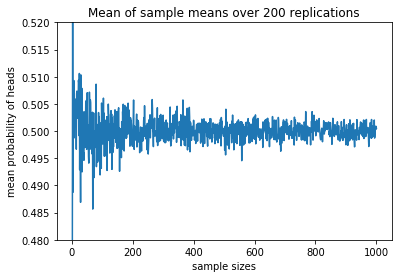

In [16]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);
plt.xlabel("sample sizes")
plt.ylabel("mean probability of heads")
plt.title("Mean of sample means over 200 replications");

Explain what you see about this "mean of sampling means".

As the sample size increases, in accordance with the Law of Large numbers, the "mean of sampling means" converges in probability towards the theoretical population expected value (0.5) for flipping a fair coin.

### Q4. What distribution do the sampling means follow?

Store in variables `sampling_means_at_size_100` and `sampling_means_at_size_1000` the set of sampling means at sample sizes of 100 and 1000 respectively, still with 200 replications. We will plot in a histogram below these distributions. What type of distributions are these, roughly? How do these distributions vary with sample size?

In [17]:
sampling_means_at_size_100 = throws[99]
sampling_means_at_size_1000 = throws[999]

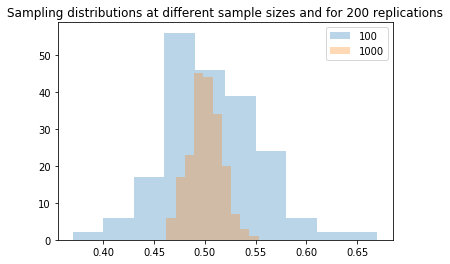

In [18]:
plt.hist(sampling_means_at_size_100, alpha=0.3, label="100", bins=10)
plt.hist(sampling_means_at_size_1000, alpha=0.3, label="1000", bins=10)
plt.legend();
plt.title("Sampling distributions at different sample sizes and for 200 replications");

What type of distributions are these, roughly? How do these distributions vary with sample size?

These distributions are roughly normal since the coin flipping distribution (binomial distribution) is approximately normal for sufficiently large sample size (n) and fixed probability (p). This is a special case of the Central Limit Theorem. 

As the sample size increases, by the Law of Large Numbers, the sample expected value converges in probability towards the population expected value (0.5).

### Q5. How does the standard error of the sample mean vary with sample size? Create a plot to illustrate how it varies over various sample sizes.

Hint: you might want to take logarithms for one of your axes

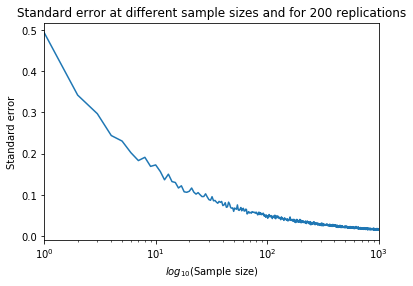

In [19]:
plt.plot(sample_sizes, std_dev_of_sample_means)
plt.xlabel("$log_{10}$(Sample size)")
plt.xlim(xmin=1., xmax=1000.)
plt.xscale("log")
plt.ylabel("Standard error")
plt.title("Standard error at different sample sizes and for 200 replications");

How does the standard error of the sample mean vary with sample size?

As the sample size increases, the standard error gets smaller, since by the Central Limit Theorem, sample means cluster more closely around the population mean.